In [1]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import RMSprop
from JenaClimate import JenaClimate
from plot_util import plot_history

Using TensorFlow backend.


In [2]:
jena_climate = JenaClimate()
train_gen, val_gen, test_gen = jena_climate.build_generator()

In [3]:
model = Sequential()
model.add(Flatten(input_shape=(jena_climate.look_back // jena_climate.step, 14)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
history = model.fit_generator(
    train_gen, steps_per_epoch=500, epochs=20, 
    validation_data=val_gen, validation_steps=jena_climate.val_steps,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 13s - loss: 1.3267 - val_loss: 0.7365
Epoch 2/20
 - 12s - loss: 0.4364 - val_loss: 0.3174
Epoch 3/20
 - 12s - loss: 0.2977 - val_loss: 0.3055
Epoch 4/20
 - 12s - loss: 0.2718 - val_loss: 0.3307
Epoch 5/20
 - 12s - loss: 0.2564 - val_loss: 0.3056
Epoch 6/20
 - 12s - loss: 0.2471 - val_loss: 0.3226
Epoch 7/20
 - 12s - loss: 0.2391 - val_loss: 0.3256
Epoch 8/20
 - 12s - loss: 0.2342 - val_loss: 0.3159
Epoch 9/20
 - 12s - loss: 0.2287 - val_loss: 0.3265
Epoch 10/20
 - 12s - loss: 0.2233 - val_loss: 0.3211
Epoch 11/20
 - 12s - loss: 0.2194 - val_loss: 0.3215
Epoch 12/20
 - 12s - loss: 0.2187 - val_loss: 0.3353
Epoch 13/20
 - 12s - loss: 0.2154 - val_loss: 0.3528
Epoch 14/20
 - 12s - loss: 0.2143 - val_loss: 0.3291
Epoch 15/20
 - 12s - loss: 0.2113 - val_loss: 0.3286
Epoch 16/20
 - 12s - loss: 0.2089 - val_loss: 0.3296
Epoch 17/20
 - 12s - loss: 0.2080 - val_loss: 0.3441
Epoch 18/20
 - 12s - loss: 0.2049 - val_loss: 0.3463
Epoch 1

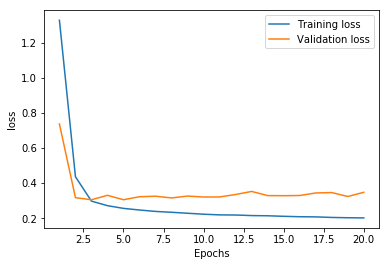

In [5]:
plot_history(history, metrics=['loss'])